In [1]:
# importujemy biblioteki
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns

In [2]:
# funkcja pobierająca plik pdf, a następnie przeprocesowuje plik na string
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ""
        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

        return text

In [3]:
path = "./bickerton.pdf"

In [4]:
text = read_pdf(path)

In [5]:
text_tokens = word_tokenize(text)

In [6]:
text_tokens

['A',
 'Remedy',
 'called',
 'Affordance',
 '28',
 'Understanding',
 'affordances',
 ':',
 'histo',
 'ry',
 'and',
 'contemporary',
 'development',
 'of',
 'Gibson',
 '’',
 's',
 'central',
 'co',
 'ncept',
 'Dobromir',
 'G.',
 'Dotov1',
 '*',
 ',',
 'Lin',
 'Nie1',
 ',',
 'and',
 'Matthieu',
 'M.',
 'de',
 'Wit2',
 '1',
 'Center',
 'for',
 'the',
 'Ecological',
 'Study',
 'of',
 'Perception',
 'and',
 'Action',
 ',',
 'University',
 'of',
 'Co',
 'nnecticut',
 ',',
 'USA',
 '2',
 'Institute',
 'of',
 'Human',
 'Performance',
 ',',
 'The',
 'Universit',
 'y',
 'of',
 'Hong',
 'Kong',
 ',',
 'Hong',
 'Kong',
 '*',
 'Corresponding',
 'author',
 'dobromir.dotov',
 '[',
 ']',
 'uconn.edu',
 'Received',
 '6',
 'June',
 '2012',
 ';',
 'accepted',
 '6',
 'November',
 '2012',
 ';',
 'published',
 'online',
 '24',
 'December',
 '201',
 '2',
 '.',
 'Abstract',
 'Gibson',
 'developed',
 'the',
 'affordance',
 'concept',
 'to',
 'complement',
 'his',
 'theory',
 'of',
 'direct',
 'perce',
 'p-',
 

In [7]:
#tutaj zmieniamy wszystkie tokeny (głównie słowa, ale też znaki interpunkcyjne) na małe
frequency = FreqDist(token.lower() for token in text_tokens)


In [8]:
frequency.most_common(10)

[(',', 370),
 ('.', 355),
 ('the', 308),
 ('of', 214),
 ('and', 151),
 ('a', 142),
 ('(', 117),
 (')', 117),
 ('to', 109),
 (':', 98)]

In [9]:
# sprawdzamy ilość słów w tekście
print(f"The total number of words in the text is {len(text_tokens)}")

The total number of words in the text is 7067


In [10]:
#ctworzyymy pustą listę na słowa
words_no_punc = []

#iterujemy przez słowa w liście, aby usunąć znaki interpunkcyjne
#isalpha sprawdza czy znaki są elementami alfabetu
for word in text_tokens:
    if word.isalpha():
        words_no_punc.append(word.lower())

#ponownie sprawdzamy ilość
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 5204


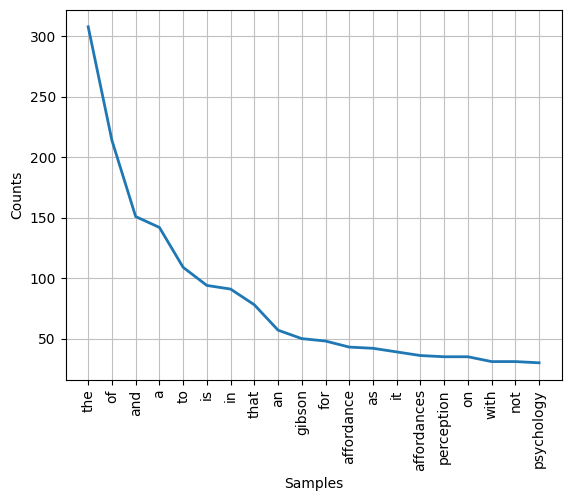

In [11]:
#testujemy frewkencje występowania danych słów
fdist = FreqDist(words_no_punc)

#wyświetlamy 20 najczęstszych słów
fdist.plot(20)
plt.show()

In [12]:
#tutaj z bilioteki nltk pobieramy moduł stopwords w celu wywalenia 
#nieistotnych dla analizy słów
nltk.download("stopwords")
from nltk.corpus import stopwords

#lista 
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pancrackhead/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
clean_words = []

#iterujemy przez listę znaków interpunkcyjnych aby wywalić stopwordsy
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")


The total number of words without punctuation and stopwords is 3087


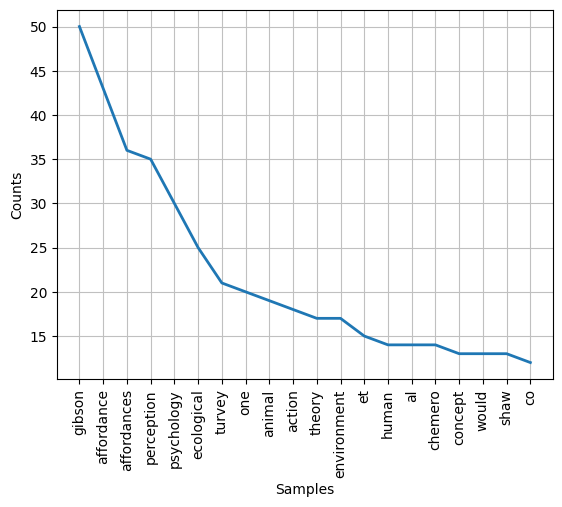

In [14]:
fdist = FreqDist(clean_words)

fdist.plot(20)

plt.show()

In [15]:
type(fdist)

nltk.probability.FreqDist

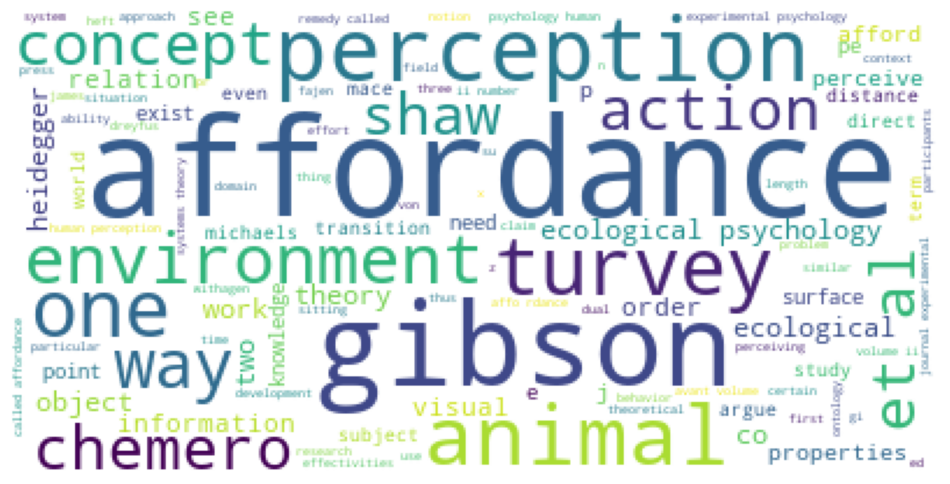

In [16]:
#przekonwertowujemy listę słów na pojedynczy string
clean_words_string = " ".join(clean_words)

#inicjujemy WorldColud i generujemy wizualizacje
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

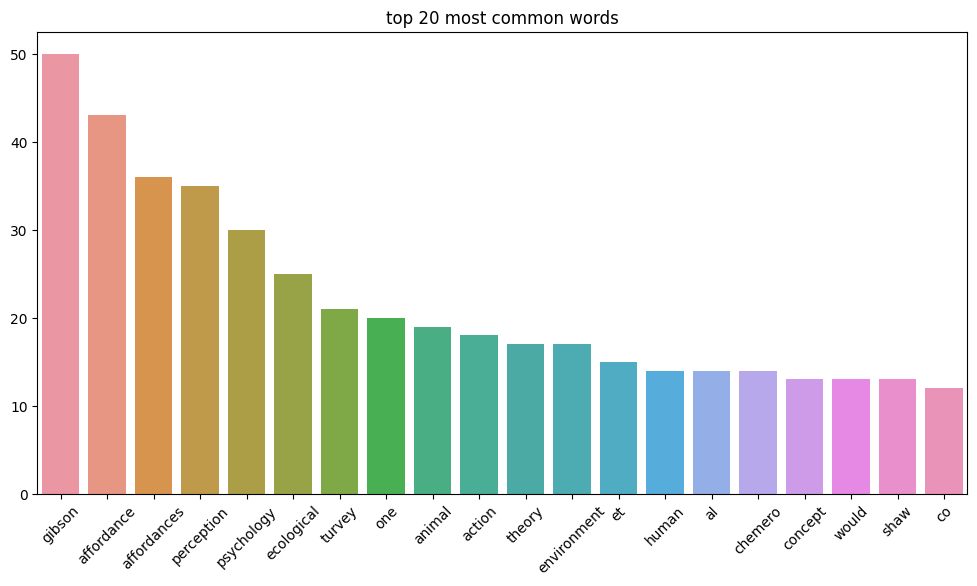

In [17]:
# za pomocą pętli iterujemy przez zbiór stworzony przez FreqDist
top_words = [word[0] for word in fdist.most_common(20)]
top_frequencies = [word[1] for word in fdist.most_common(20)]

plt.figure(figsize=(12,6))
sns.barplot(x=top_words, y=top_frequencies)
plt.title("top 20 most common words")
plt.xticks(rotation=45)
plt.show()